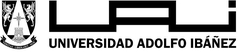

#**Laboratorio 02:** Laboratorio LSTM

**Fecha de Entrega:** 08 de mayo de 2021

# Integrante(s): 
(*3 alumnos como máximo*)


1.   Alumno 01
2.   Alumno 02 (Opcional)
3.   Alumno 03 (Opcional)


# 1. Introducción

##1.1 Descripción del problema

La empresa ACME desea poder estimar la cantidad de alimentos diarios que debe comprar para atender a sus clientes. Para ello cuenta con una base de datos donde se registra la relación de ventas versus la cantidad de alimento comprado ese día. La relación de ventas se definen en las siguientes variables: Apertura, Demanda-Alta,Demanda_Baja,Cierre y Cierre2.

Se pide construir un regresor que permita calcular el **volumen de alimento diario** utilizando las cinco variables de entrada. 

Considere un largo de secuencia (tamaño de la ventana) uno y otro de mayor valor. ¿Hay mejora si utilizan un valor mayor de secuencia?



**NOTA:**

El documento de laboratorio debe contener las siguientes secciones para explicar cada uno de los experimentos:

*  **Librerías**: Debe indicar todas las librerías que serán utilizadas en el laboratorio. Prestando atención en **no colocar librerías** que no serán utilizadas en los experimentos.
*  **Carga de la base de datos**: Incluye el código necesario para poder cargar los datos y la construcción de los _dataloader_.
*  **Diseño del modelo**: Describir brevemente (en formato texto) la arquitectura de la red neuronal a implementar. Indicar la cantidad de datos de entrada, capas ocultas, salidas, número de neuronas, etc.
* **Parámetros y configuración del modelo**: Esta sección debe contener una breve explicación de los parámetros utilizados para la construcción del modelo y una implementación en pytorch.
* **Entrenamiento y validación**: Se deben describir metodológicamente como se realizará el entrenamiento. Definir hiperparámetros, función de coste, etc. Además, debe implementar el código adecuado para la optimización de parámetros utilizando descenso de gradiente (estocástico u otro). 
* **Pruebas**: Implementar el código que permita probar los parámetros, hiperparámetros y modelo, obtenido en la etapa de aprendizaje (entrenamiento). 
* **Resultados**: Calcular las métricas de rendimiento del clasificador para la etapa de entrenamiento y para pruebas. Explique los resultados obtenidos. Utilice la matriz de confusión, presición, recall y tasa de acierto para explicar el comportamiento del modelo.
* **Conclusiones**: La conclusión consiste en sintetizar brevemente los puntos más relevantes, aportando nuevos **conocimientos** explorados en el laboratorio. Las conclusiones no son un resumen de lo realizado sino a lo que ha llevado el desarrollo del proyecto, no perdiendo de vista los objetivos planteados desde el principio y los resultados obtenidos. Es usual concluir con lo que queda por hacer, o sugerencias para mejorar.


##1.2   Objetivos

### Objetivo general
Defina el objetivo general.

### Objetivos específicos
1. Defina los objetivos para este laboratorio.
2.
3.


##1.3 Librerías 

In [60]:
# Librería para matrices
import numpy as np
# Librería para cargar datos como dataframe
import pandas as pd
# Librería para imprimir gráficos
import matplotlib.pyplot as plt
# Libería para escalar los datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Librerías pytorch
import torch 
# Librerías modelos pytorch
import torch.nn as nn
# Librerías para instanciar variables
from torch.autograd import Variable 

## 1.4 Carga de base de datos desde google drive

In [61]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/D-UCN/Classes/DeepLearning/UAI-1-2021/LaboratorioAlumno

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/D-UCN/Classes/DeepLearning/UAI-1-2021/LaboratorioAlumno


Carga de datos, desde google drive, del archivo csv.

In [62]:
# Lee el archivo de stock de alimentos
# La columna Fecha es indicada como indice para la tabla
# Las fechas como string son convertidas a fechas (date)
df = pd.read_csv('volumen-alimentos-stock.csv', index_col = 'Fecha', parse_dates=True)
df.head()

,Apertura,Demanda-Alta,Demanda_Baja,Cierre,Cierre2,Volumen-Alimento
Fecha,,,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996,84.480545,4921900
2019-12-12,88.000000,88.889999,87.540001,88.209999,86.061089,10282100
2019-12-13,88.019997,88.790001,87.580002,88.669998,86.509880,6714100
2019-12-16,89.139999,89.300003,88.430000,88.779999,86.617203,6705600
2019-12-17,88.870003,88.970001,87.470001,88.129997,85.983040,7296900


In [65]:
# Obtengo los las primeras variables predictoras (Variables de entrada)
X = df.iloc[:, :-1]
# Obtengo el valor de la variable a predecir
y = df.iloc[:, 5:6] 

#X.head()
#y.head()

## 1.5 Visualizar la variable Volumen-Alimento

En ciencia de datos siempre es bueno revisar como se está cargando la base de datos con el fin de comprobar la consistencia de estos.

Text(0.5, 1.0, 'Volumen de alimentos almacenados en el tiempo')

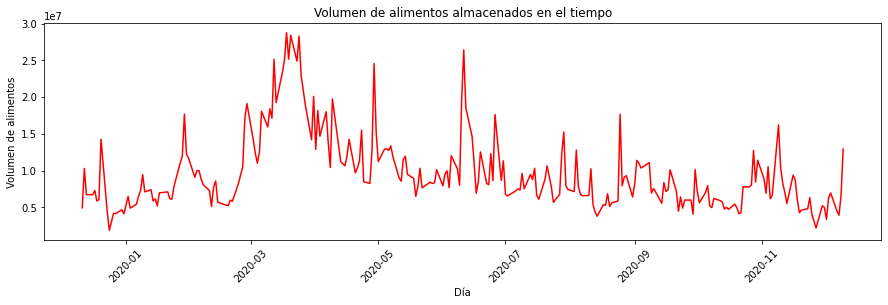

In [68]:
plt.figure(figsize=(15,4))
plt.plot(y, color='red')
plt.xticks(rotation = 45)
plt.xlabel('Día')
plt.ylabel('Volumen de alimentos')
plt.title('Volumen de alimentos almacenados en el tiempo')

## 1.6 Normalizar los datos 

Normalizar los datos para condicionar los modelos. Para las variables de entrada se normaliza en media con desviación estándar uno. La variable de salida queda es normalizada a valores que fluctúan entre cero y uno.

In [ ]:
# Normaliza los datos entre cero y uno
min_max_scaler = MinMaxScaler()
# Normaliza las características dejando los datos con media  y desviación estándar 
stand_scaler = StandardScaler()

X_ss = stand_scaler.fit_transform(X)
y_mm = min_max_scaler.fit_transform(y) 

## 1.7 Separar el conjunto de entrenamiento y pruebas

Se utilizan los primeros 200 valores para entrenamiento y los valores restantes para probar la estimaciones de la serie de tiempo.

In [72]:
#Los primeros 200 ejemplos son utilizados para entrenamiento

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_mm[:200, :]
y_test = y_mm[200:, :] 

In [73]:
# Imprimimos las dimensiones del conjunto de pruebas y entrenamiento
print('Dimensiones conjunto de entrenamiento', X_train.shape, y_train.shape)
print('Dimensiones conjunto de pruebas', X_test.shape, y_test.shape) 

Dimensiones conjunto de entrenamiento (200, 5) (200, 1)
Dimensiones conjunto de pruebas (53, 5) (53, 1)


## 1.8 Convertir los datos en formato numpy a tensor

In [75]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

print(X_train_tensors.shape)

torch.Size([200, 5])


In [76]:
# Cambiar las dimensiones del tensor para que pueda ser usado como batch
#reshaping to rows, timestamps, features

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print('Dimensiones conjunto de entrenamiento', X_train_tensors_final.shape, y_train_tensors.shape)
print('Dimensiones conjunto de pruebas', X_test_tensors_final.shape, y_test_tensors.shape)

X_train_tensors_final.shape[1]

Dimensiones conjunto de entrenamiento torch.Size([200, 1, 5]) torch.Size([200, 1])
Dimensiones conjunto de pruebas torch.Size([53, 1, 5]) torch.Size([53, 1])


1

#2. Predicción de serie de tiempo (LSTM)

Desarrollo de los experimentos para estimar los valores de volumen de alimentos almacenados en el tiempo, considerando las variables: Apertura	Demanda-Alta	Demanda_Baja	Cierre	Cierre2.


## 2.1 Diseño del modelo propuesto

Explicar arquitectura que arquitectura LSTM se utilizará para resolver el problema.

<completar>

* Entrada de datos: <completar>
* Modelo lineal propuesto: <completar>
* Salida esperada de datos: <completar>

## 2.2 Parámetros y configuración del modelo

Explicar los parámetros e hiperparámetros seleccionados para la implementación del modelo, función de pérdida y modelo de optimización.

<completar>

In [ ]:
# Hiperparámetros
num_epochs = 2000
learning_rate = 0.001 #0.001 tasa de aprendizaje

input_size = 5 #numero de caracteristicas de entrada
hidden_size = 2 #numero de caracteristicas de estado oculto
num_layers = 1 #numero de redes recurrentes apiladas

num_classes = 1 #numero de clases 

In [93]:
# Definir modelo LSTM

class MiLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(MiLSTM, self).__init__()
        self.num_classes = num_classes #numero de clases
        self.num_layers = num_layers #numero de capas
        self.input_size = input_size #tamaño de la entrada
        self.hidden_size = hidden_size #tamaño del estado oculto
        self.seq_length = seq_length #largo de la secuencia

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 64) #fully connected 1
        self.fc = nn.Linear(64, num_classes) #fully connected de la ultima capa

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #estado oculto
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #estado interno
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm.forward(x, (h_0, c_0)) #lstm con entrada, estado oculto, y estado interno
        hn = hn.view(-1, self.hidden_size) #cambiando vista para red densa
        out = self.relu(hn)
        out = self.fc_1(out) #primera red densa
        out = self.relu(out) #relu
        out = self.fc(out) #red densa de salida
        return out

In [94]:
# Creo una instancia del modelo LSTM
lstm_p1 = MiLSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

# Función de pérdida y optimizador
criterion = torch.nn.MSELoss()    # Error cuadratico medio para la regresion
optimizer = torch.optim.Adam(lstm_p1.parameters(), lr=learning_rate) 

## 3.3 Entrenamiento

Implementar entrenamiento.

In [89]:
# Implementar ciclo de entrenamiento

for epoch in range(num_epochs):
  outputs = lstm_p1(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.09309
Epoch: 100, loss: 0.03889
Epoch: 200, loss: 0.03111
Epoch: 300, loss: 0.02063
Epoch: 400, loss: 0.01776
Epoch: 500, loss: 0.01651
Epoch: 600, loss: 0.01506
Epoch: 700, loss: 0.01391
Epoch: 800, loss: 0.01290
Epoch: 900, loss: 0.01195
Epoch: 1000, loss: 0.01152
Epoch: 1100, loss: 0.01136
Epoch: 1200, loss: 0.01128
Epoch: 1300, loss: 0.01122
Epoch: 1400, loss: 0.01117
Epoch: 1500, loss: 0.01112
Epoch: 1600, loss: 0.01108
Epoch: 1700, loss: 0.01104
Epoch: 1800, loss: 0.01100
Epoch: 1900, loss: 0.01098


### Gráfico de función de pérdida del conjunto de entrenamiento

## 2.3 Pruebas

Explicar como se realizarán los experimentos y su pruebas. 

Los experimentos del conjunto de pruebas dependen de los hiperparámetros obtenidos en el entrenamiento. Explicar como son fijados esos hiperparámetros para el conjunto de prueba.

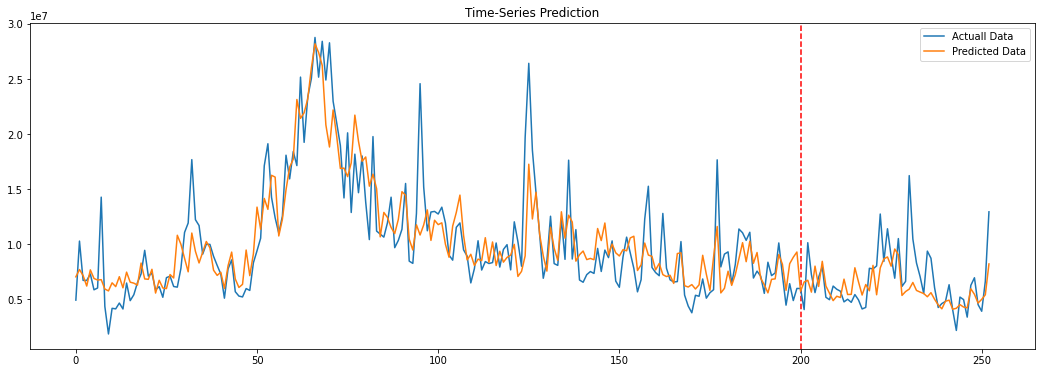

In [90]:
df_X_ss = stand_scaler.transform(df.iloc[:, :-1]) #old transformers
df_y_mm = min_max_scaler.transform(df.iloc[:, -1:]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1])) 

train_predict = lstm_p1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = min_max_scaler.inverse_transform(data_predict) #reverse transformation
dataY_plot = min_max_scaler.inverse_transform(dataY_plot)
plt.figure(figsize=(18,6)) #plotting
plt.axvline(x=200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

## 2.4 Resultados

Mostrar los resultados del **entrenamiento** y **pruebas**.
Utilizar un gráfico que muestre la serie real vs la serie predicha. Separar los datos que corresponden a los de entrenamiento y pruebas tal como se vió en clases.


Calcular el error cuadrático medio para el conjunto de entrenamiento.

Calcular el error cuadrático medio para el conjunto de pruebas.

#3. Conclusiones

Conclusiones sobre el uso de la técnica. Ventajas y desventajas. ¿Se cumplen los objetivos del laboratorio?. ¿Como se comparan los resultados con los experimientos hechos en clases para el mismo problema?

